Segunda parte del parcial 
cargamos las  librerias pesadas

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

cargamos las librerias no pesadas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Cargas los datos de un DataFrame

In [7]:
df = pd.read_csv('dataset_fish.csv')

para enternder las  columnas aqui unas imagenes 

<img src ="primero.jpeg">

<img src = "segundo.jpeg">

cambianos el nombre a los titulos para entender mejor 

In [21]:
df.rename(columns={"Weight":"Peso","Length1": "L_Vertical", "Length2": "L_Diagonal", "Length3": "L_Transversal","Height":"Altura","Width":"Ancho"},inplace=True)
df.head()

,Species,Peso,L_Vertical,L_Diagonal,L_Transversal,Altura,Ancho
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


obtenemos la lista de la cantidad de peces que tenemos en la base de datos

In [ ]:
df['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

Analizamos los datos , aqui hacemos la exploracin de datos 

primero ocupamos el head() para la visualizacion de las primeras filas

Segundo ocupamos el describe() son estadisticas descriptivas

In [28]:
df.head()

,Species,Peso,L_Vertical,L_Diagonal,L_Transversal,Altura,Ancho
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [26]:
df.describe()

,Peso,L_Vertical,L_Diagonal,L_Transversal,Altura,Ancho
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


obtuvimos un dato donde nos muestra que el minimo es cero en peso , esto es algo para analizarlo e investigar que ocurre 

Buscar que pez esta ocacionando este problema

In [29]:
peso_cero = df[df['Peso']==0]
peso_cero

,Species,Peso,L_Vertical,L_Diagonal,L_Transversal,Altura,Ancho
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


buscamos valores nulos 

In [37]:
df.isnull().sum()

Species          0
Peso             0
L_Vertical       0
L_Diagonal       0
L_Transversal    0
Altura           0
Ancho            0
dtype: int64

Esta limpio eso es bueno , busquemos cuales son los valores unicos

In [38]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

Ya sabemos cuantos tipos de pescado tenemos y ahora veamos la cantidad de pescados que hay de cada uno 

In [39]:
df['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

ya con los datos vlaros realizamos lo que es la REGRECION LINEAL 

vamos a quitar loq ue son las letras o lo que no tenga que ver con numeros 

In [47]:
datos_pez_num = df.drop(['Species'], axis=1)
datos_pez_num.head()

,Peso,L_Vertical,L_Diagonal,L_Transversal,Altura,Ancho
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [62]:
x = datos_pez_num[['L_Vertical','L_Diagonal','L_Transversal','Altura','Ancho']]
x.head(4)

,L_Vertical,L_Diagonal,L_Transversal,Altura,Ancho
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555


obtendremos el dato del peso 

In [63]:
y =  datos_pez_num[['Peso']]
y.head()


,Peso
0,242.0
1,290.0
2,340.0
3,363.0
4,430.0


In [65]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

ahora creamos el modelo de regrecion lineal en blnaco para poder trabajar en ello 

In [66]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [67]:
y_pred = model.predict(X_test)

mostarmos los valoes

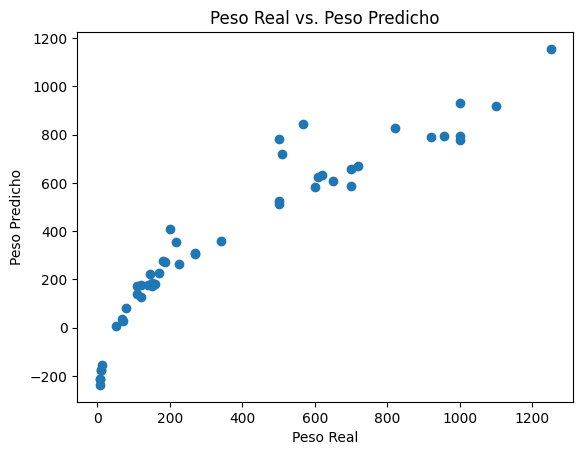

In [68]:
plt.scatter(y_test, y_pred)
plt.xlabel("Peso Real")
plt.ylabel("Peso Predicho")
plt.title("Peso Real vs. Peso Predicho")
plt.show()

<Axes: >

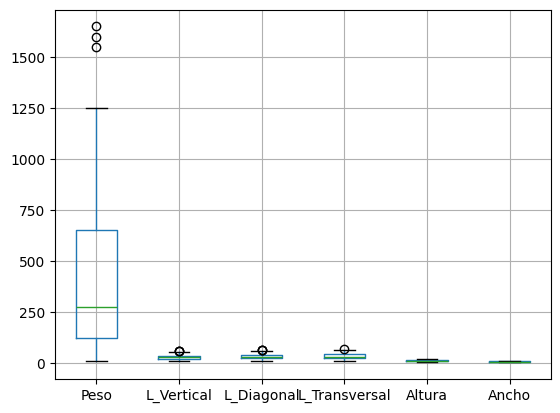

In [69]:
df.boxplot()

In [72]:
porcentaje = model.score(X_test,y_test) *100
print(f"porcentaje de prediccion {porcentaje}%")

porcentaje de prediccion 86.95572241561591%
